<a href="https://colab.research.google.com/github/gitmystuff/DTSC4050/blob/main/Week_13-Classification_II/Classification_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13: Classification II

Your Name

## Getting Started

* Colab - get notebook from gitmystuff DTSC4050 repository
* Save a Copy in Drive
* Remove Copy of
* Edit name
* Take attendance
* Clean up Colab Notebooks folder
* Submit shared link

## Gradio

* Check out Gradio - https://www.gradio.app/

## Binary Logistic Regression

$y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$

$p = \large{\frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2)}}}$

$f(x) = \large{\frac{1}{1 + e^{-x}}}$

* x = $\beta_0 + \beta_1X_1 + \beta_2X_2$
* If $x > 0$ then $\frac{1}{1 + e^{-x}} > .5$
* If $x < 0$ then $\frac{1}{1 + e^{-x}} < .5$

The algorithm transforms the numbers ( -∞ to +∞ ) to values between 0 and 1 in the shape of an S-curve.

Optimization terminated successfully.
         Current function value: 0.242088
         Iterations 8


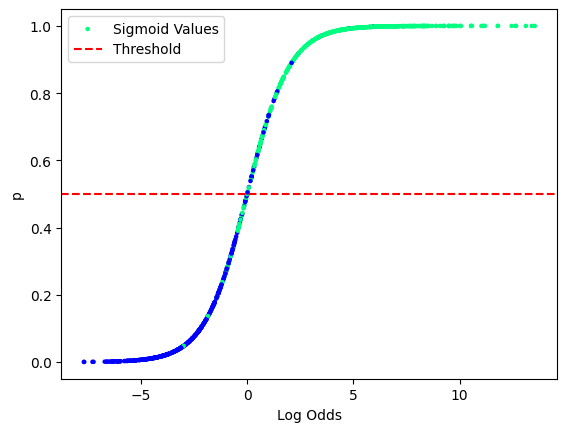

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from statsmodels.formula.api import logit

def logistic_function(row):
    b0 = model.params.Intercept
    b1 = model.params.X_1
    b2 = model.params.X_2

    x1 = row['X_1']
    x2 = row['X_2']

    return 1 / (1 + np.exp(-(b0+(b1*x1)+(b2*x2))))

features, binary_class = make_classification(n_samples=1000, n_features=2,
                                             n_informative=2, n_redundant=0,
                                             n_clusters_per_class=1, random_state=42)

df = pd.DataFrame(features)
df.columns = ['X_1', 'X_2']
df['Class'] = binary_class
model = logit(formula='Class ~ X_1 + X_2', data=df).fit()

df['p'] = df.apply(logistic_function, axis=1)
df['Predicted'] =  df['p'].apply(lambda x: 0 if x < .5 else 1)
df['Odds'] = df['p']/(1 - df['p'])
df['Log Odds'] = df['Odds'].apply(lambda x: math.log(x))

df.plot.scatter(x='Log Odds', y='p', marker='.', label='Sigmoid Values', c=df['Class'], cmap='winter', colorbar=False)
plt.axhline(y=.5, color='red', linestyle='dashed', label='Threshold')
plt.legend()
plt.show()

## Data Science Fiction

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/data_science_fiction.csv', index_col=0)
print(df.shape)
print(df.info())
df.head()

(1008, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1007
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   moon_col_1       1008 non-null   object 
 1   saturn           1008 non-null   int64  
 2   jupiter          1008 non-null   int64  
 3   collaboration    1005 non-null   float64
 4   earth            1008 non-null   float64
 5   emot_vol         1003 non-null   float64
 6   resourcefulness  1006 non-null   float64
 7   ingenuity        1003 non-null   float64
 8   mars             1008 non-null   float64
 9   chron_dist       1006 non-null   float64
 10  moon_col_2       1008 non-null   float64
 11  env_destr        1005 non-null   float64
 12  sex              1004 non-null   object 
 13  brain_wave       1008 non-null   object 
 14  given_name       1008 non-null   object 
 15  surname          1008 non-null   object 
 16  zipcode          1008 non-null   int64  
 17  date_of_

,moon_col_1,saturn,jupiter,collaboration,earth,emot_vol,resourcefulness,ingenuity,mars,chron_dist,moon_col_2,env_destr,sex,brain_wave,given_name,surname,zipcode,date_of_birth,state,class
0,mountain,2520,25531,1.871016,1.87,-0.943410,1.871016,1.086506,1.87,1.871016,0.03,0.452337,'seed',ALPHA,Antonio,Brown,74169,2001-06-12,'North Dakota',1
1,mountain,1848,22012,1.059565,1.06,-0.337253,1.059565,0.949748,1.06,1.059565,0.03,0.394683,'seed',BETA,Christopher,Hudson,96144,1965-02-17,'Michigan',1
2,mountain,1497,15326,1.654911,1.65,-1.407970,1.654911,0.012663,1.65,1.654911,0.03,-0.003179,'egg',DELTA,Joanna,Frederick,64990,1938-03-23,'West Virginia',1
3,mountain,2769,15079,-0.075044,-0.08,-1.699400,0.075044,2.777259,-0.08,-0.075044,0.03,1.150172,'seed',ALPHA,Jeremy,Brewer,51974,1924-04-26,'California',0
4,mountain,1244,28038,-0.762473,-0.76,-1.366091,0.762473,1.223753,-0.76,-0.762473,0.03,0.505893,'egg',ALPHA,Teresa,Wade,24246,1942-09-09,'Kansas',0


### Data Prep

In [ ]:
! git clone https://github.com/gitmystuff/preppy.git

Cloning into 'preppy'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 30 (delta 8), reused 13 (delta 5), pack-reused 0
Receiving objects: 100% (30/30), 18.15 KiB | 4.54 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
from preppy.version import __version__

print(__version__)

PrepPy Version: 0.1.0


In [ ]:
# check for constants
import preppy.utils as utils

consts = utils.functions.identify_consts(df)
print(consts)

['moon_col_2']


In [ ]:
quasi_consts = utils.functions.identify_quasi_consts(df)
print(quasi_consts)

['moon_col_1', 'moon_col_2']


In [ ]:
df.drop(quasi_consts, axis=1, inplace=True)

In [ ]:
# quasi constant values (sometimes these may be boolean features)
quasi_consts = []
for val in df.columns.sort_values():
    if (len(df[val].unique()) < 3 and max(df[val].value_counts(normalize=True)) > .95): # maybe .99?
        quasi_consts.append(val)

quasi_consts

['moon_col_1', 'moon_col_2']

In [ ]:
# duplicate rows
df[df.duplicated(keep=False)]

,moon_col_1,saturn,jupiter,collaboration,earth,emot_vol,resourcefulness,ingenuity,mars,chron_dist,moon_col_2,env_destr,sex,brain_wave,given_name,surname,zipcode,date_of_birth,state,class
311,mountain,2607,20654,0.722171,0.72,-0.050358,0.722171,1.123054,0.72,0.722171,0.03,0.466040,'egg',BETA,Sarah,Merritt,86634,1918-04-11,'Minnesota',1
325,mountain,2330,18430,-1.869888,-1.87,-1.435279,1.869888,0.249839,-1.87,-1.869888,0.03,-0.105811,'egg',THETA,Dawn,Ortiz,85614,1975-01-08,'Arizona',0
331,mountain,1956,29181,1.161966,1.16,-0.464397,1.161966,0.881017,1.16,1.161966,0.03,0.366344,'seed',DELTA,Marcus,Livingston,19751,1963-08-11,'Indiana',1
400,mountain,1956,29181,1.161966,1.16,-0.464397,1.161966,0.881017,1.16,1.161966,0.03,0.366344,'seed',DELTA,Marcus,Livingston,19751,1963-08-11,'Indiana',1
416,mountain,2528,10084,1.568205,1.57,-1.184023,1.568205,0.242960,1.57,1.568205,0.03,0.102585,'seed',THETA,Dustin,Luna,76567,1992-01-23,'Utah',1
467,mountain,2084,11257,1.172398,1.17,-0.335958,1.172398,1.114058,1.17,1.172398,0.03,0.462876,'seed',DELTA,Gary,Torres,38316,1948-06-16,'North Dakota',1
588,mountain,1310,24144,1.591760,1.59,-0.960571,1.591760,0.656157,1.59,1.591760,0.03,0.273750,'egg',DELTA,Sherry,Scott,23602,2000-07-15,'Ohio',1
605,mountain,2532,29140,-0.714525,-0.71,-1.531963,0.714525,1.574242,-0.71,-0.714525,0.03,0.651116,'seed',BETA,Patrick,Fisher,73733,1934-06-16,'Hawaii',0
631,mountain,1310,24144,1.591760,1.59,-0.960571,1.591760,0.656157,1.59,1.591760,0.03,0.273750,'egg',DELTA,Sherry,Scott,23602,2000-07-15,'Ohio',1
729,mountain,2607,20654,0.722171,0.72,-0.050358,0.722171,1.123054,0.72,0.722171,0.03,0.466040,'egg',BETA,Sarah,Merritt,86634,1918-04-11,'Minnesota',1


In [ ]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# check of duplicate columns
duplicate_features = []
for i in range(0, len(df.columns)):
    orig = df.columns[i]

    for dupe in df.columns[i + 1:]:
        if df[orig].equals(df[dupe]):
            duplicate_features.append(dupe)

duplicate_features

['mars']

In [ ]:
df.drop(duplicate_features, axis=1, inplace=True)

### OHE

In [ ]:
for feat in df.select_dtypes('object'):
  print(f'{feat} has {len(df[feat].value_counts())} unique labels')

sex has 2 unique labels
brain_wave has 4 unique labels
given_name has 357 unique labels
surname has 508 unique labels
date_of_birth has 991 unique labels
state has 50 unique labels


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_features = []
for feat in df.select_dtypes('object'):
  if len(df[feat].value_counts()) < 3:
    df[feat] = df[feat].map({df[feat].value_counts().index[0]: 0, df[feat].value_counts().index[1]: 1})
  elif 2 < len(df[feat].value_counts()) < 6:
    cat_features.append(feat)
  elif len(df[feat].value_counts()) > 5:
    freq = df.groupby(feat).size()/len(df)
    df[feat] = df[feat].map(freq)

ohe = OneHotEncoder(categories='auto', drop='first', sparse_output=False, handle_unknown='ignore')
ohe_df = ohe.fit_transform(df[cat_features])
ohe_df = pd.DataFrame(ohe_df, columns=ohe.get_feature_names_out(cat_features))
df.index = df.index
df = df.join(ohe_df)
df.drop(cat_features, axis=1, inplace=True)

### Missing Values

In [ ]:
# check for nulls
df.isnull().sum()

saturn              0
jupiter             0
collaboration       3
earth               0
emot_vol            5
resourcefulness     2
ingenuity           5
chron_dist          2
env_destr           3
sex                 4
given_name          0
surname             0
zipcode             0
date_of_birth       0
state               3
class               0
brain_wave_BETA     8
brain_wave_DELTA    8
brain_wave_THETA    8
dtype: int64

In [ ]:
df[df.columns[df.isnull().sum() > 1]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1007
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   collaboration     997 non-null    float64
 1   emot_vol          995 non-null    float64
 2   resourcefulness   998 non-null    float64
 3   ingenuity         995 non-null    float64
 4   chron_dist        998 non-null    float64
 5   env_destr         997 non-null    float64
 6   sex               996 non-null    float64
 7   state             997 non-null    float64
 8   brain_wave_BETA   992 non-null    float64
 9   brain_wave_DELTA  992 non-null    float64
 10  brain_wave_THETA  992 non-null    float64
dtypes: float64(11)
memory usage: 126.0 KB


In [ ]:
for feat in df.columns[df.isnull().sum() > 1]:
  if df[feat].dtype == 'object':
    print('object', feat)
    df[feat].fillna(df[feat].mode()[0], inplace=True)
  else:
    print('numeric', feat, df[feat].skew())
    if abs(df[feat].skew()) < .8:
      df[feat].fillna(round(df[feat].mean(), 2), inplace=True)
    else:
      df[feat].fillna(df[feat].median(), inplace=True)

df.isnull().sum()

numeric collaboration 0.18000985957131968
numeric emot_vol -0.30814982535064
numeric resourcefulness 0.5453550078164151
numeric ingenuity 0.7059064582896115
numeric chron_dist 0.17363943566576429
numeric env_destr -0.048913417980882314
numeric sex 0.0
numeric state 0.1388262398262411
numeric brain_wave_BETA 1.266003831315825
numeric brain_wave_DELTA 1.0425534091379487
numeric brain_wave_THETA 1.2134563233821458


saturn              0
jupiter             0
collaboration       0
earth               0
emot_vol            0
resourcefulness     0
ingenuity           0
chron_dist          0
env_destr           0
sex                 0
given_name          0
surname             0
zipcode             0
date_of_birth       0
state               0
class               0
brain_wave_BETA     0
brain_wave_DELTA    0
brain_wave_THETA    0
dtype: int64

### Descriptive Statistics



In [ ]:
df.describe()

The area between -3 and 3 is considered to contains 99.73% of the area in the curve
The area between -2 and 2 is considered to contains 95.44% of the area in the curve
The area between -1 and 1 is considered to contains 68.26% of the area in the curve
The blue line is the expected average of the normal distribution at 50%

Mean:  0.0011926774887508508
Median:  0.0024867978591186866
Mode? -4.327343348872149
Variance:  1.0058909897803558
Standard Deviation:  1.0029411696507207

The corresponding percentile for 1 standard deviation above the mean (z) is 0.8403453540498387%.
a z score for 84%  is 0.9985754300435203 and,
a z score for 50% is 0.0
for normal distributions.



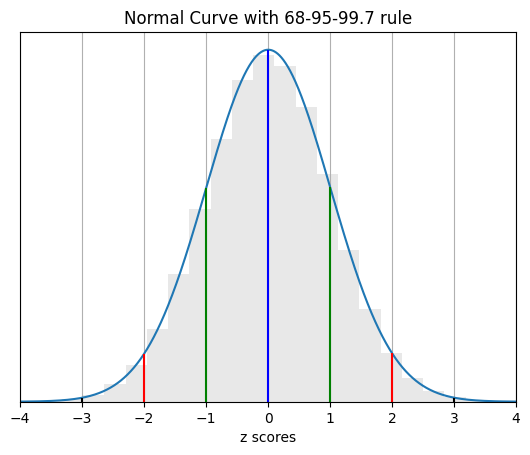

In [ ]:
# normal curve
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

X = stats.norm.rvs(size=100000)
X.sort()

parameters = stats.norm.fit(X)
mu, sigma = parameters

print('The area between -3 and 3 is considered to contains 99.73% of the area in the curve')
print('The area between -2 and 2 is considered to contains 95.44% of the area in the curve')
print('The area between -1 and 1 is considered to contains 68.26% of the area in the curve')
print('The blue line is the expected average of the normal distribution at 50%')
print()
print('Mean: ', np.mean(X))
print('Median: ', np.median(X))
print('Mode?', X[1])
print('Variance: ', np.var(X))
print('Standard Deviation: ', np.std(X))
print()

print(f'The corresponding percentile for 1 standard deviation above the mean (z) is {stats.norm.cdf(1, loc=mu, scale=sigma)}%.')
print(f'a z score for 84%  is {stats.norm.ppf(0.84, loc=mu, scale=sigma)} and,')
print(f'a z score for 50% is {np.round(stats.norm.ppf(0.5, loc=mu, scale=sigma), 2)}')
print('for normal distributions.')
print()

fig, ax = plt.subplots()
ax.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
ax.hist(X, bins=25, density=True, color='lightgray', alpha=0.5)
ax.set_xlabel('z scores')
# ax.set_ylabel('pdf(x)')
ax.set_xlim(-4, 4)
ax.grid(True)

plt.vlines(x=-3, ymin=0, ymax=stats.norm.pdf(-3, loc=mu, scale=sigma), color='black')
plt.vlines(x=-2, ymin=0, ymax=stats.norm.pdf(-2, loc=mu, scale=sigma), color='red')
plt.vlines(x=-1, ymin=0, ymax=stats.norm.pdf(-1, loc=mu, scale=sigma), color='green')
plt.vlines(x=0, ymin=0, ymax=stats.norm.pdf(0, loc=mu, scale=sigma), color='blue')
plt.vlines(x=1, ymin=0, ymax=stats.norm.pdf(1, loc=mu, scale=sigma), color='green')
plt.vlines(x=2, ymin=0, ymax=stats.norm.pdf(2, loc=mu, scale=sigma), color='red')
plt.vlines(x=3, ymin=0, ymax=stats.norm.pdf(3, loc=mu, scale=sigma), color='black')
plt.yticks([])

plt.title('Normal Curve with 68-95-99.7 rule')
plt.show()

In [2]:
# cdf ppf playground
import numpy as np
from scipy import stats

def given_z(z, tail=1):
  if tail == 1:
    return np.round(stats.norm.cdf(z), 2)
  elif tail == 2:
    return np.round(stats.norm.cdf(z) - stats.norm.cdf(-z), 2)

def given_perc(perc, tail=1):
  if tail == 1:
    return np.round(stats.norm.ppf(perc), 2)
  elif tail == 2:
    return np.round(stats.norm.ppf((1+perc)/2), 2)

print(given_z(1.96, 2))
print(given_perc(.95, 2))

0.95
1.96


### Scaling and Outliers

In [ ]:
df['zipcode'] = df['zipcode'].astype('object')

In [ ]:
df._get_numeric_data().idxmax(1)[0]

'jupiter'

In [ ]:
from sklearn.preprocessing import StandardScaler

feat = str(df._get_numeric_data().idxmax(1)[0])
scaler = StandardScaler()
df[feat] = scaler.fit_transform(df[[feat]].values)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

feat = str(df._get_numeric_data().idxmax(1)[0])
scaler = MinMaxScaler()
df[feat] = scaler.fit_transform(df[[feat]].values)

In [ ]:
for feat in df._get_numeric_data().columns[1:]:
    q1 = df[feat].quantile(0.25)
    q3 = df[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr)
    upper_fence = (q3 + 1.5 * iqr)
    lower_count = df[feat][df[feat] < lower_fence].count()
    upper_count = df[feat][df[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

jupiter outliers = 0: lower_fence: -3.4536007617583793, upper_fence: 3.4383050722449546, lower_count: 0, upper_count: 0
collaboration outliers = 0: lower_fence: -3.9060691690182088, upper_fence: 3.9013212890569635, lower_count: 0, upper_count: 0
earth outliers = 0: lower_fence: -3.9149999999999996, upper_fence: 3.9049999999999994, lower_count: 0, upper_count: 0
emot_vol outliers = 22: lower_fence: -2.5698810142249924, upper_fence: 0.16718486541401778, lower_count: 22, upper_count: 0
resourcefulness outliers = 7: lower_fence: -0.9804458644981733, upper_fence: 2.9633376061272756, lower_count: 0, upper_count: 7
ingenuity outliers = 11: lower_fence: -1.244961786699443, upper_fence: 3.5307981404300315, lower_count: 0, upper_count: 11
chron_dist outliers = 0: lower_fence: -3.8996051362443267, upper_fence: 3.897442869392634, lower_count: 0, upper_count: 0
env_destr outliers = 10: lower_fence: -0.7571333396376203, upper_fence: 1.5966696334364001, lower_count: 5, upper_count: 5
sex outliers = 0

In [ ]:
print(df.shape)
df.info()

(1000, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1007
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   saturn            1000 non-null   float64
 1   jupiter           1000 non-null   float64
 2   collaboration     1000 non-null   float64
 3   earth             1000 non-null   float64
 4   emot_vol          1000 non-null   float64
 5   resourcefulness   1000 non-null   float64
 6   ingenuity         1000 non-null   float64
 7   chron_dist        1000 non-null   float64
 8   env_destr         1000 non-null   float64
 9   sex               1000 non-null   float64
 10  given_name        1000 non-null   float64
 11  surname           1000 non-null   float64
 12  zipcode           1000 non-null   object 
 13  date_of_birth     1000 non-null   float64
 14  state             1000 non-null   float64
 15  class             1000 non-null   int64  
 16  brain_wave_BETA   1000 non-null   fl

### Modeling

In [ ]:
from sklearn.model_selection import train_test_split

# X_train, X_test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.30)

In [ ]:
# Create model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
# confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, labels=[0, 1]))

[[131  11]
 [ 20 138]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       142
           1       0.93      0.87      0.90       158

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



### ROC AUC and Youden

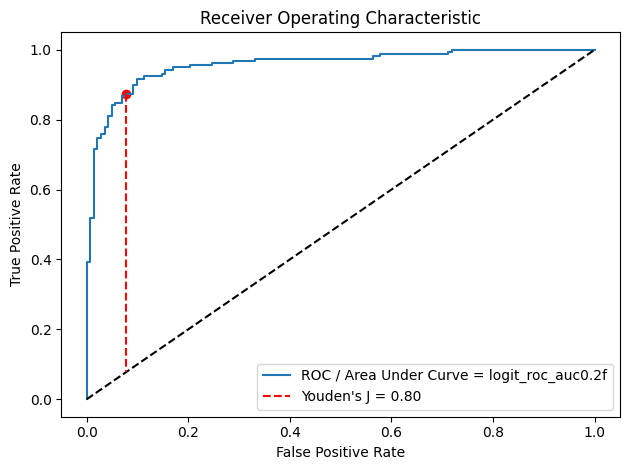

In [ ]:
# plot ROC, and Youden's J
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import math

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

optimum_fpr = fp/(tn+fp)
optimum_tpr = tp/(fn+tp)

logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'ROC / Area Under Curve = {logit_roc_auc:0.2f}')
plt.plot([0, 1], [0, 1],'k--')
plt.scatter(optimum_fpr, optimum_tpr, c='red')
plt.plot([optimum_fpr, optimum_fpr], [optimum_tpr, optimum_fpr], 'r--', label='Youden\'s J = %0.2f'
         % calculateDistance(optimum_fpr, optimum_fpr, optimum_tpr, optimum_fpr))
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.tight_layout()

## Model Evaluation

* https://www.linkedin.com/pulse/using-confusion-matrices-quantify-cost-being-wrong-bill-schmarzo/
* https://towardsdatascience.com/demystifying-confusion-matrix-29f3037b0cfa
* https://towardsdatascience.com/understanding-the-confusion-matrix-and-its-business-applications-c4e8aaf37f42

### The Confusion Matrix

Suppose we have some tabular data and each observation is labeled either a 0 or 1. Our goal is to create a model and predict whether new data will be labelled a 0 or a 1.

**True Positive (TP)**: An outcome that is labeled 1 and in reality is a 1

**False Positive (FP)**: An outcome that labeled 1 and in reality is a 0

**True Negative (TN)**: An outcome that is labeled 0 and in reality is a 0

**False Negative (FN)**: An outcome that is labeled 0 and in reality is a 1

**Accuracy**: (TP + TN) / (TP + FP + TN + FN)

**Precision**: TP / (TP + FP), a measure of quality

**Recall**: TP / (TP + FN), a measure of quantity



In [ ]:
# calculate accuracy, precision, recall


### Type I and Type II Errors

https://towardsdatascience.com/statistics-for-data-scientists-f2456d26c5a5

Type I Error means rejecting the True null hypothesis and accepting the alternate hypothesis. It is a false positive. A smoke detector detecting smoke when there is no smoke.
Type II Error means accepting the null hypothesis when an alternate hypothesis is true. It is a false negative. When fire alarm fails to detect fire.

### Alpha and Beta Level

Alpha level is also known as the significance level, α. It is the probability of making the wrong decision,i.e., rejecting the null hypothesis when it is true. Low alpha levels mean that we need strong evidence to be able to reject the null hypothesis. This means that alpha level of 1% requires more statistical evidence than 5%.

Why is 0.05 (5%) used as significance level so commonly?

The smaller the alpha level, the little is the chance to reject True Null hypothesis. And, also the smaller is the chance to reject the False null hypothesis, because of the tiny area. The more you try to avoid Type I Error, the more you are likely to make a Type II Error.

A confidence level is 1 - α, which means accepting the null hypothesis when it is True.
Beta level means the probability of making a Type II Error, i.e., rejecting the Alternate hypothesis when it is True.

### Confustion Matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix)... It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table). They provide our True Negatives, False Positives, False Negatives, and True Positives, from which we derive Accuracy, Precision, and Recall.

https://en.wikipedia.org/wiki/Confusion_matrix

**Note**: Because of the of the output sklearn provides, we will structure our table different from what Wikipedia says.

Confused? Please be aware of the distinction. In this course we will be using the sklearn matrix. There is a way to change the rows and columns to match Wikipedia's matrix by adding labels: confusion_matrix(y_test, predictions, labels=\[1, 0\]).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create dataset
n = 1000 # number of observations
f = 2 # number of features
inform = 2 # number of meaningful features
features, binary_class = make_classification(n_samples=n, n_features=f,
                                             n_informative=inform, n_redundant=0,
                                             n_clusters_per_class=1, random_state=13)

# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2']
df['Target'] = binary_class
df.head()

,Feature_1,Feature_2,Target
0,-1.355723,0.932216,0
1,-1.448966,0.628289,0
2,-0.259349,-0.792658,0
3,0.815272,-0.205096,1
4,1.430197,1.342170,1


In [ ]:
from sklearn.model_selection import train_test_split

# X_train, X_test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.20)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Create model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

**The Solver (liblinear)**: Solvers are used to minimize the loss function which in turn provides our best coefficients. Please see the documentation to learn about the five different solvers.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [ ]:
# View confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print()
print('Here is what the numbers represent from the sklLearn output')
print('''
                 predicted
                   |  0  |  1
           --------------------
           class 0 | TN  |  FP
  actual   --------------------
           class 1 | FN  |  TP
''')
print()
print('Here is what the numbers represent from the Wikipedia article')
print('''
                 actual
                   |  1  |  0
           --------------------
           class 1 | TP  |  FP
predicted  --------------------
           class 0 | FN  |  TN
''')

Confusion Matrix
[[82 16]
 [19 83]]

Here is what the numbers represent from the sklLearn output

                 predicted
                   |  0  |  1
           --------------------
           class 0 | TN  |  FP
  actual   --------------------
           class 1 | FN  |  TP


Here is what the numbers represent from the Wikipedia article

                 actual
                   |  1  |  0
           --------------------
           class 1 | TP  |  FP
predicted  --------------------
           class 0 | FN  |  TN



In [ ]:
# Compare with crosstab
pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,82,16,98
1,19,83,102
All,101,99,200


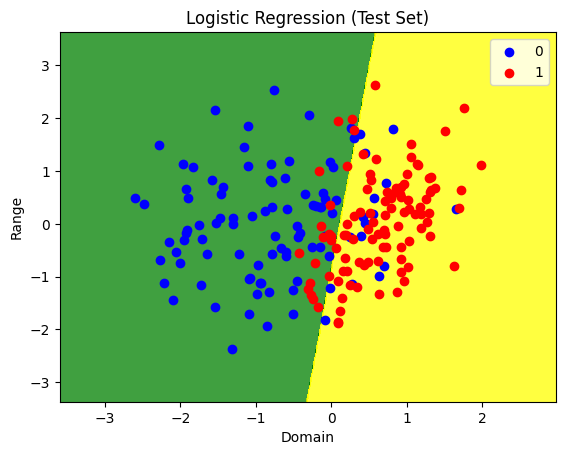

In [ ]:
# review our plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'yellow')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'red'))(i), label = j)

plt.title('Logistic Regression (Test Set)')
plt.xlabel('Domain')
plt.ylabel('Range')
plt.legend()
plt.show()

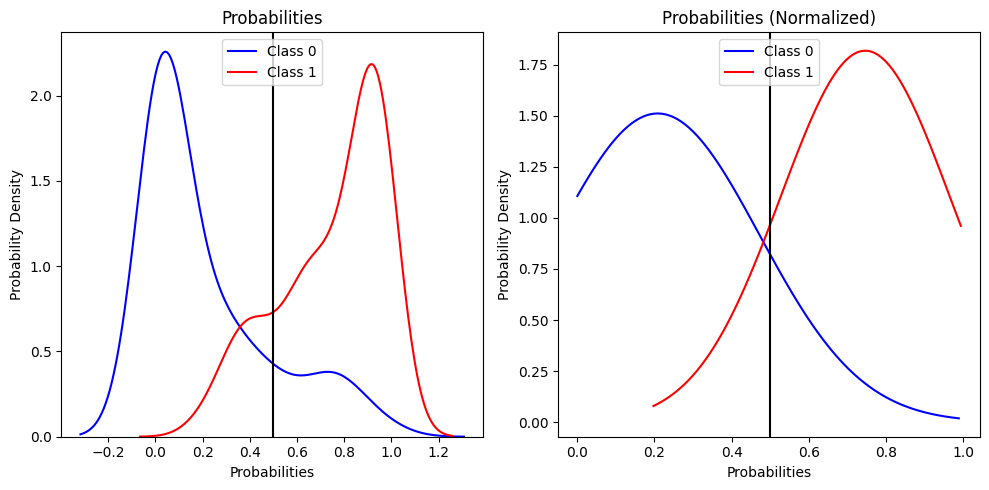

In [ ]:
# Compare KDE plots for probabilities and normed probabilities
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

probs=model.predict_proba(X_test)[:,1]
sns.kdeplot(probs[y_test==0], shade=False, color='blue', label='Class 0', ax=ax1);
sns.kdeplot(probs[y_test==1], shade=False, color='red', label='Class 1', ax=ax1);
ax1.axvline(x=.5, color='black')
ax1.set_title('Probabilities')
ax1.set(xlabel='Probabilities', ylabel='Probability Density')

mean = probs[y_test==0].mean()
std = probs[y_test==0].std()
x = np.linspace(probs[y_test==0].min(), probs[y_test==0].max(), 100)
y = scipy.stats.norm.pdf(x,mean,std)
ax2.plot(x, y, color='blue', label='Class 0')

mean = probs[y_test==1].mean()
std = probs[y_test==1].std()
x = np.linspace(probs[y_test==1].min(), probs[y_test==1].max(), 100)
y = scipy.stats.norm.pdf(x,mean,std)
ax2.plot(x, y, color='red', label='Class 1')

x_threshold = 0.5
ax2.axvline(x=x_threshold,color='black')

ax2.set_title('Probabilities (Normalized)')
ax2.set(xlabel='Probabilities', ylabel='Probability Density')

ax1.legend(loc='upper center')
ax2.legend(loc='upper center')
plt.tight_layout()
plt.show()

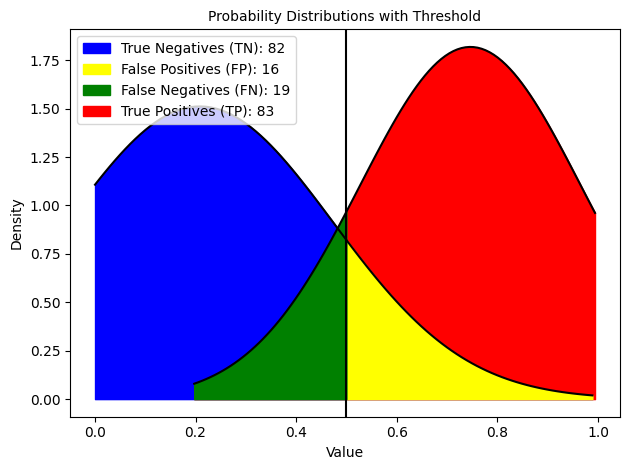

In [ ]:
# visualize TN, FN, FP, TP
import math
import matplotlib.patches as mpatches

x_threshold = 0.5
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

mean_0 = probs[y_test==0].mean()
std_0 = probs[y_test==0].std()
x_0 = np.linspace(probs[y_test==0].min(), probs[y_test==0].max(), 100)
y_0 = scipy.stats.norm.pdf(x_0,mean_0,std_0)

mean_1 = probs[y_test==1].mean()
std_1 = probs[y_test==1].std()
x_1 = np.linspace(probs[y_test==1].min(), probs[y_test==1].max(), 100)
y_1 = scipy.stats.norm.pdf(x_1,mean_1,std_1)

plt.plot(x_0, y_0, color='black')
plt.fill_between(x_0, y_0, color='blue', alpha=1)

plt.plot(x,y, color='black')
plt.fill_between(x_1, y_1, color='red', alpha=1)

ptx_0 = np.linspace(x_threshold, probs[y_test==0].max(), 100)
pty_0 = scipy.stats.norm.pdf(ptx_0,mean_0,std_0)
plt.fill_between(ptx_0, pty_0, color='yellow', alpha=1)

ptx_1 = np.linspace(probs[y_test==1].min(), x_threshold, 100)
pty_1 = scipy.stats.norm.pdf(ptx_1,mean_1,std_1)
plt.fill_between(ptx_1, pty_1, color='green', alpha=1)

tn_patch = mpatches.Patch(color='blue', label='True Negatives (TN): ' + str(tn))
fp_patch = mpatches.Patch(color='yellow', label='False Positives (FP): ' + str(fp))
fn_patch = mpatches.Patch(color='green', label='False Negatives (FN): ' + str(fn))
tp_patch = mpatches.Patch(color='red', label='True Positives (TP): ' + str(tp))
plt.legend(handles=[tn_patch,fp_patch,fn_patch,tp_patch], loc=2)

plt.title('Probability Distributions with Threshold',fontsize=10)
plt.axvline(x=x_threshold,color='black')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()

### The Classification Report

Consider a fraudualent credit card dataset where there may be a 1 (for fraudulent activity) per 1000 0s of normal activity. We wouldn't need to build a predictive model to make correct predictions 99% of the time. The data itself lets us do that. We need metrics that tell us that the model we build is learning about the relevant data and that it predicts what it is suppose to predict. This gets back to our Precision Recall Tradeoff.

**Precision**: The sum of observations correctly classified as positive out of the total observations classified as positive. From the formula, tp / (tp + fp), we can see we want to mimimize fp (false positives), or type I errors, which is sounding an alarm when there is no fire.

**Recall**: The sum of observations correctly classified as positive out of the total actual positives. From the forumula, tp / (tp + fn), we can see we want to minimize fn (false negatives), or type II errors, which is not sounding an alarm when there is a fire.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, labels=[0, 1]))

[[82 16]
 [19 83]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        98
           1       0.84      0.81      0.83       102

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



We know about accuracy, precision, and recall and we've talked about f1-score as being the harmonic mean of precision and recall (f1 score = 2 * (precision * recall) / (precision + recall)).

* support: the number of observations labeled 0 or 1 (remember the pie chart we made of the target?)
* macro avg: the average between the two classes (e.g. (prec 0 + prec 1) / 2
* weighted avg: the average between the two classes taking into account the number of their observations (e.g. ((prec0 * score0) + (prec 1 * score1)) / total)

A classification report provides a little more information by providing metrics for each class. For example, for class 0, our recall is higher than our precision, which tells us that there are fewer false negatives than false positives in class 0.

### Underfitting and Overfitting

In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably". An overfitted model is a statistical model that contains more parameters than can be justified by the data.

<img src='https://docs.aws.amazon.com/images/machine-learning/latest/dg/images/mlconcepts_image5.png' alt='underfitting overfitting' />

https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

If you're overfitting, or you are getting great training scores and poor  test scores, you might be overfitting so try removing the lesser performing features. The model is just memorizing the training data.

Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data. An under-fitted model is a model where some parameters or terms that would appear in a correctly specified model are missing.[2] Under-fitting would occur, for example, when fitting a linear model to non-linear data. Such a model will tend to have poor predictive performance.

If you're underfitting, or you are getting poor training scores and test scores, you might be underfitting so try adding more data or more features.

https://en.wikipedia.org/wiki/Overfitting

### Bias Variance Tradeoff

In statistics and machine learning, the bias–variance tradeoff is the property of a model that the variance of the parameter estimates across samples can be reduced by increasing the bias in the estimated parameters. The bias–variance dilemma or bias–variance problem is the conflict in trying to simultaneously minimize these two sources of error that prevent supervised learning algorithms from generalizing beyond their training set.

https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

Please become familiar with this image:

<img src='https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg' alt='bias variance tradeoff' />

Please read the article responsible for the image:

https://www.kdnuggets.com/2016/08/bias-variance-tradeoff-overview.html

#### A Formula

$E[(\hat{y} - y)^2] = E[(\hat{y} - E[\hat{y})^2] + (E[\hat{y}] - y)^2$
<br />MSE = Variance + Bias^2
* where y = given y, (ground truth)
* $\hat{y}$ = prediction
* $E[\hat{y}]$ = expected value or average of predictions
* error = $\frac{fp + fn}{total}$
* Bias = error in training
* Variance = range of predictions, how much an estimate of the target function will change if different data was is

<table width='50%' style='margin-right: 100%'>
    <tr>
        <td>Training Error</td>
        <td>1%</td>
        <td>15%</td>
        <td>16%</td>
        <td>1%</td>
    </tr>
    <tr>
        <td>Testing Error</td>
        <td>15%</td>
        <td>16%</td>
        <td>33%</td>
        <td>1%</td>
    </tr>
    <tr>
        <td></td>
        <td>lo bias</td>
        <td>hi bias</td>
        <td>hi bias</td>
        <td>lo bias</td>
    </tr>
    <tr>
        <td></td>
        <td>hi var</td>
        <td>lo var</td>
        <td>hi var</td>
        <td>lo var</td>
    </tr>
</table>

https://www.mastersindatascience.org/learning/difference-between-bias-and-variance/

### Precision Recall Tradeoff

In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance... Accuracy can be a misleading metric for imbalanced data sets. Consider a sample with 95 negative and 5 positive values. Classifying all values as negative in this case gives 0.95 accuracy score.

https://en.wikipedia.org/wiki/Precision_and_recall

In cases of imbalanced data, precision, recall, and f1 score become useful metrics. Precision tells us the proportion of data that was predicted was actually predicted correctly. Recall, also known as the True Positive Rate, is the probability that an actual positive will be predicted to be positive.

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

https://en.wikipedia.org/wiki/Precision_and_recall

<img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*GM10sFuFBAbhwBt2scuP1g.png' alt='precision recall tradeoff' />

https://datascience-george.medium.com/the-precision-recall-trade-off-aa295faba140

The following is a visualization of our true negatives, false positives, false negatives, and true positives from the data set generated with make_classification.

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('Confusion Matrix')
print()
print(f'''
           survived predicted
                   |  0   |  1
           -----------------------  -----------------------------------------
           no      | {tn}  |  {fp}     fpr (type I error)  | tnr
  actual   -----------------------  -----------------------------------------
           yes     | {fn}   |  {tp}     tpr (recall)        | fnr (type II error)

                    for   | precision
           ----------------------------
                    npv   | fdr

''')

Confusion Matrix


           survived predicted
                   |  0   |  1
           -----------------------  -----------------------------------------
           no      | 90  |  10     fpr (type I error)  | tnr
  actual   -----------------------  -----------------------------------------
           yes     | 9   |  91     tpr (recall)        | fnr (type II error)

                    for   | precision
           ----------------------------
                    npv   | fdr




### Metrics

* tn = pred 0 actual 0
* fp = pred 1 actual 0
* fn = pred 0 actual 1
* tp = pred 1 actual 1
* acc(uracy) = $\frac{tn + tp}{total}$
* error = $\frac{fp + fn}{total}$
* prev(alence) = $\frac{fn + tp}{total}$
* queue = $\frac{fp + tp}{total}$
* tpr = $\frac{tp}{tp + fn}$
    * true positive rate
    * recall
    * sensitivity
    * prob of detection
    * 1 - fnr
* fnr = $\frac{fn}{tp + fn}$
    * false negative rate
    * type II error
    * 1 - tpr
* tnr = $\frac{tn}{tn + fp}$
    * true negative rate
    * specificity
    * 1 - fpr
* fpr = $\frac{fp}{tn + fp}$
    * false positive rate
    * type I error
    * fall out
    * prob of false claim
    * 1 - tnr
* ppv = $\frac{tp}{tp + fp}$
    * positive predicted value
    * precision
    * 1 - fdr
* fdr = $\frac{fp}{tp + fp}$
    * false discovery rate
    * 1 - ppv
* npv = $\frac{tn}{tn + fn}$
    * negative predicted value
    * 1 - for
* for = $\frac{fn}{tn + fn}$
    * false omission rate
    * 1 - npv
* liklihood ratio+ (lr+) = $\frac{tpr}{fpr}$
    * roc
* liklihood ratio- (lr-) = $\frac{fnr}{tnr}$
* diagnostic odds ratio = $\frac{lr+}{lr-}$
* f1 score = 2 * $\frac{precision-recall}{precision+recall}$
* Youden's J = sensitivity + specificity - 1 = tpr - fpr
* Matthew's Correlation Coefficient = $\frac{(tp*tn)-(fp*tp)}{\sqrt{(tp+fp)(tp+fn)(tn+fp)(tn+fn)}}$
  

## Model Comparisons

In [ ]:
# get data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

comparisons = pd.read_csv('https://raw.githubusercontent.com/sudarshan-koirala/K-Nearest-Neighbors-Social-Network-Ads/master/Social_Network_Ads.csv')
print(comparisons.shape)
print(comparisons.head())
print(comparisons.info())

(400, 5)
    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
None


In [ ]:
# get X and y and train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(comparisons.drop(['User ID', 'Gender', 'Purchased'], axis=1),
                                                    comparisons.Purchased,
                                                    test_size=0.2, random_state=42)

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

### Logistic Regression

[[50  2]
 [ 9 19]]
0.8625


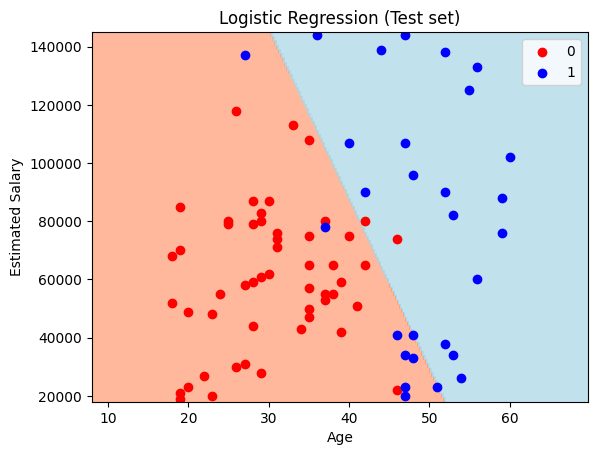

In [ ]:
# model, predict, evaluate, and plot
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightsalmon', 'lightblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Multinomial Logistic Regression

* Multinomial Logistic Regression Notebook

### K Nearest Neighbor

* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#/media/File:KnnClassification.svg
* Choose the number of K neighbors
* Within the perimeter, count the number of each class
* New data point is assigned the class with the highest count

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[48  4]
 [ 3 25]]
0.9125


### Support Vector Classifier

* https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:SVM_margin.png
* Linearly separable
* Identify the hyperplane (similar to line of best fit used in regression)
* Find the support vectors
* Maximize the margin
* Identify negative and positive hyperplanes
* Compares apples that look like oranges and vice versa that reside near the margin (support vectors)
* Support Vectors Notebook


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 9 19]]
0.8625


### SVC with Kernel


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 1 27]]
0.925


### Naive Bayes

* Naive Bayes Notebook


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 3 25]]
0.9375


### Decision Tree Classifier

* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

#### Terms

* Root node
* Splitting
* Decision node
* Leaf / terminal node
* Pruning
* Branch
* Parent and child nodes

#### Attribute Selection Measures

* Gini index
* Entropy
* Information gain
* Gain ratio
* Reduction in variance
* Chi-square

More next week

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[46  6]
 [ 7 21]]
0.8375


### Random Forest Classifier

* Random sample of X_train when building trees
* Random subsets of features
* Bagging

More next week

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 6 22]]
0.8625
